# Importando bibliotecas


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    classification_report
)

import nltk
from nltk.corpus import stopwords

import joblib


# Base de dados



Foi utilizado um conjunto de dados da Americanas que é  é uma das maiores e mais tradicionais redes varejistas do Brasil, conhecida por suas lojas físicas e e-commerce. Segue o link do dataset https://github.com/americanas-tech/b2w-reviews01/blob/main/B2W-Reviews01.csv.

## Lendo arquivo csv

- *ir na barra lateral em arquivos e fazer upload da basee de  dados, (arquivos com formatos diferentes o codg muda, no que está abaixo é para ler arquivos csv) coloque o nome do arquivo dentro dos aspas com a extensão dele*

In [ ]:
nome_arquivo = 'B2W-Reviews01.csv'
df = pd.read_csv(nome_arquivo, engine='python')
df.head()


,submission_date,reviewer_id,product_id,product_name,product_brand,site_category_lv1,site_category_lv2,review_title,overall_rating,recommend_to_a_friend,review_text,reviewer_birth_year,reviewer_gender,reviewer_state
0,2018-01-01 00:11:28,d0fb1ca69422530334178f5c8624aa7a99da47907c44de...,132532965,Notebook Asus Vivobook Max X541NA-GO472T Intel...,NaN,Informática,Notebook,Bom,4,Yes,Estou contente com a compra entrega rápida o ú...,1958.0,F,RJ
1,2018-01-01 00:13:48,014d6dc5a10aed1ff1e6f349fb2b059a2d3de511c7538a...,22562178,Copo Acrílico Com Canudo 500ml Rocie,NaN,Utilidades Domésticas,"Copos, Taças e Canecas","Preço imbatível, ótima qualidade",4,Yes,"Por apenas R$1994.20,eu consegui comprar esse ...",1996.0,M,SC
2,2018-01-01 00:26:02,44f2c8edd93471926fff601274b8b2b5c4824e386ae4f2...,113022329,Panela de Pressão Elétrica Philips Walita Dail...,philips walita,Eletroportáteis,Panela Elétrica,ATENDE TODAS AS EXPECTATIVA.,4,Yes,SUPERA EM AGILIDADE E PRATICIDADE OUTRAS PANEL...,1984.0,M,SP
3,2018-01-01 00:35:54,ce741665c1764ab2d77539e18d0e4f66dde6213c9f0863...,113851581,Betoneira Columbus - Roma Brinquedos,roma jensen,Brinquedos,Veículos de Brinquedo,presente mais que desejado,4,Yes,MEU FILHO AMOU! PARECE DE VERDADE COM TANTOS D...,1985.0,F,SP
4,2018-01-01 01:00:28,7d7b6b18dda804a897359276cef0ca252f9932bf4b5c8e...,131788803,"Smart TV LED 43"" LG 43UJ6525 Ultra HD 4K com C...",lg,TV e Home Theater,TV,"Sem duvidas, excelente",5,Yes,"A entrega foi no prazo, as americanas estão de...",1994.0,M,MG


## Exploração e Limpeza de Dados (EDA)

## Explorando o dataset

Verificar quantidade de linhas, colunas e tipos de dados.


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 132373 entries, 0 to 132372
Data columns (total 14 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   submission_date        132373 non-null  object 
 1   reviewer_id            132373 non-null  object 
 2   product_id             132373 non-null  object 
 3   product_name           132289 non-null  object 
 4   product_brand          40982 non-null   object 
 5   site_category_lv1      132367 non-null  object 
 6   site_category_lv2      128360 non-null  object 
 7   review_title           132071 non-null  object 
 8   overall_rating         132373 non-null  int64  
 9   recommend_to_a_friend  132355 non-null  object 
 10  review_text            129098 non-null  object 
 11  reviewer_birth_year    126389 non-null  float64
 12  reviewer_gender        128237 non-null  object 
 13  reviewer_state         128382 non-null  object 
dtypes: float64(1), int64(1), object(12)


Ver o tamanho do dataset:

In [ ]:
df.shape

(132373, 14)

Identificar colunas relevantes

In [ ]:
df.columns

Index(['submission_date', 'reviewer_id', 'product_id', 'product_name',
       'product_brand', 'site_category_lv1', 'site_category_lv2',
       'review_title', 'overall_rating', 'recommend_to_a_friend',
       'review_text', 'reviewer_birth_year', 'reviewer_gender',
       'reviewer_state'],
      dtype='object')

## Limpeza  de dados

Verficando quantidade de dados nulos

In [ ]:
df.isnull().sum()

,0
submission_date,0
reviewer_id,0
product_id,0
product_name,84
product_brand,91391
site_category_lv1,6
site_category_lv2,4013
review_title,302
overall_rating,0
recommend_to_a_friend,18


Verificando quantidade de dados duplicados

In [2]:
df.duplicated().sum()


NameError: name 'df' is not defined

### Rotulagem (regras de negócio)

No dataframe as colunas  alvos de acordo com a proposta dodesafio Hackathon seriam as colunas de comentários e o sentimento do cliente que  o avaliou, com esse objetivo as colunas usadas para o desafio serão:

*   review_score
*   review_comment_message


In [ ]:
df_limpo = df.dropna(subset=['review_text']).copy()

df_limpo = df_limpo[['review_text', 'overall_rating']]
df_limpo.head()

,review_text,overall_rating
0,Estou contente com a compra entrega rápida o ú...,4
1,"Por apenas R$1994.20,eu consegui comprar esse ...",4
2,SUPERA EM AGILIDADE E PRATICIDADE OUTRAS PANEL...,4
3,MEU FILHO AMOU! PARECE DE VERDADE COM TANTOS D...,4
4,"A entrega foi no prazo, as americanas estão de...",5


removendo os campos nulos, duplicados ou vazios

In [ ]:
df_limpo = df_limpo.dropna(subset=['review_text', 'overall_rating'])
df_limpo = df_limpo[df_limpo['review_text'].str.strip() != '']
df_limpo = df_limpo.drop_duplicates()
df_limpo.isnull().sum()

,0
review_text,0
overall_rating,0


A coluna de 'review_text' será o comentário/avaliação escrita, já a coluna de 'overall_rating' terá a função de indicar qual o tipo/emoção da avaliação, como a coluna 'overall_rating' é do tipo int64 e precisamos classificar as avaliações de modo binário (positivo ou negativo), aplicamos uma regra de negócios pra transformar as nota em sentimentos binários:


* Notas 1 e 2 = Negativo
* Nota 3 = removida do dataset
* Notas 4 e 5 = Positivo

Ao testar o modelo trinário(positivo, neutro ou negativo) e considerar a nota 3 como neutro, foi observado que o modelo não aprendeu o sentimento neutro pois os comentário eram ammbíguos como por exemplo: "Material bom, mas modelagem ruim!"ou "Veio a cor errada, mas serviu", pegando palavras que estão no TF-IDF tanto do negativo ("ruim"), quanto do positivo ("bom"). Então para uma máxima precisão usaremos uma classificação binária(positivo e negativo).


In [ ]:
df_limpo = df_limpo[df_limpo['overall_rating'] != 3].copy()
def definir_sentimento_binario(score):
    return 'Positivo' if score > 3 else 'Negativo'

df_limpo['sentiment'] = df_limpo['overall_rating'].apply(definir_sentimento_binario)
df_limpo.head()

,review_text,overall_rating,sentiment
0,Estou contente com a compra entrega rápida o ú...,4,Positivo
1,"Por apenas R$1994.20,eu consegui comprar esse ...",4,Positivo
2,SUPERA EM AGILIDADE E PRATICIDADE OUTRAS PANEL...,4,Positivo
3,MEU FILHO AMOU! PARECE DE VERDADE COM TANTOS D...,4,Positivo
4,"A entrega foi no prazo, as americanas estão de...",5,Positivo


In [1]:
#removendo a coluna de notas numéricas
df_limpo.drop(columns=['overall_rating'], inplace=True)
df_limpo.head()

NameError: name 'df_limpo' is not defined

In [ ]:
df_limpo['sentiment'].value_counts()

,count
sentiment,
Positivo,78326
Negativo,32605


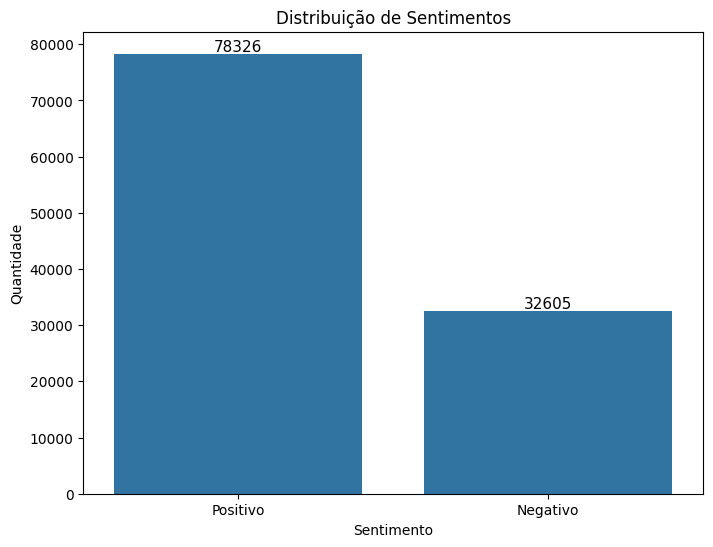

In [ ]:
plt.figure(figsize=(8, 6))
ax = sns.countplot(data=df_limpo, x='sentiment')
plt.title('Distribuição de Sentimentos')
plt.xlabel('Sentimento')
plt.ylabel('Quantidade')

for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=11, color='black', xytext=(0, 5),
                textcoords='offset points')

plt.show()

De acordo com a contagem de linhas por sentiment é notável a predominância de comentários positivos na base de dados.

In [ ]:
df_limpo['review_length'] = df_limpo['review_text'].apply(len)
media_tamanho_comentarios = df_limpo['review_length'].mean()
print(f"Média do tamanho dos comentários: {media_tamanho_comentarios:.2f} caracteres")

Média do tamanho dos comentários: 135.35 caracteres


A média de caracteres da coluna 'review text' é de comentários curtos e médios

# DIVISÃO TREINO E TESTE

In [ ]:
X = df_limpo['review_text']
y = df_limpo['sentiment']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

In [ ]:
print(f"\nTamanho Treino: {len(X_train)}")
print(f"Tamanho Teste: {len(X_test)}")


Tamanho Treino: 88744
Tamanho Teste: 22187


## Pipeline de Vetorização e Classificação

Nesta etapa, utilizamos um Pipeline para unificar a vetorização e o treinamento. A técnica TF-IDF transforma os textos crus em vetores numéricos, destacando termos distintos e filtrando palavras genéricas. Ao integrar esse processo diretamente ao modelo, garantimos que o algoritmo aprenda os padrões de sentimento (Positivo/Negativo) de forma eficiente e sem vazamento de dados (data leakage) entre treino e teste.



In [ ]:
nltk.download('stopwords')
pt_stopwords = stopwords.words('portuguese')

palavras_para_manter = ['não', 'nem', 'jamais', 'nada', 'nunca']

stop_words_custom = [w for w in pt_stopwords if w not in palavras_para_manter]


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
pipeline = Pipeline([
    ('tfidf', TfidfVectorizer(
        min_df=3,
        max_features=5000,
        ngram_range=(1, 2),
        stop_words=stop_words_custom
    )),
    ('clf', LogisticRegression(
        max_iter=1000,
        multi_class="auto",
        class_weight="balanced"

    ))
])

## Treinar o modelo supervisionado usando Regressão Logística

In [ ]:
pipeline.fit(X_train, y_train)

/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


Pipeline(steps=[('tfidf',
                 TfidfVectorizer(max_features=5000, min_df=3,
                                 ngram_range=(1, 2),
                                 stop_words=['a', 'à', 'ao', 'aos', 'aquela',
                                             'aquelas', 'aquele', 'aqueles',
                                             'aquilo', 'as', 'às', 'até', 'com',
                                             'como', 'da', 'das', 'de', 'dela',
                                             'delas', 'dele', 'deles', 'depois',
                                             'do', 'dos', 'e', 'é', 'ela',
                                             'elas', 'ele', 'eles', ...])),
                ('clf',
                 LogisticRegression(class_weight='balanced', max_iter=1000,
                                    multi_class='auto'))])

previsõess

In [ ]:
y_pred = pipeline.predict(X_test)

# Critérios de Avaliação do Modelo

## Calcular Acurácia
visão geral do desempenho

In [ ]:
accuracy = accuracy_score(y_test, y_pred)
print(f"Acurácia: {accuracy:.2f}")


Acurácia: 0.94


## Calcular precisão
indica quantos positivos previstos estavam corretos

In [ ]:
precision = precision_score(y_test, y_pred, average='weighted')
print(f"Precisão: {precision:.2f}")


Precisão: 0.95


## Calcular recall
mostra se o modelo está perdendo exemplos importantes

In [ ]:
recall = recall_score(y_test, y_pred, average='weighted')
print(f"Recall: {recall:.2f}")


Recall: 0.94


## Calcular F1-Score
equilíbrio entre precisão e recall

In [ ]:
f1 = f1_score(y_test, y_pred, average='weighted')
print(f"F1-Score: {f1:.2f}")


F1-Score: 0.94


In [ ]:
y_pred = pipeline.predict(X_test)

print(classification_report(
    y_test,
    y_pred,
    target_names=["negativo", "positivo"]
))


              precision    recall  f1-score   support

    negativo       0.87      0.95      0.91      6521
    positivo       0.98      0.94      0.96     15666

    accuracy                           0.94     22187
   macro avg       0.92      0.95      0.93     22187
weighted avg       0.95      0.94      0.94     22187



## Fazer e avaliar a matriz de confusão
identifica quais sentimentos estão sendo confundidos e quais o modelo está acertando,

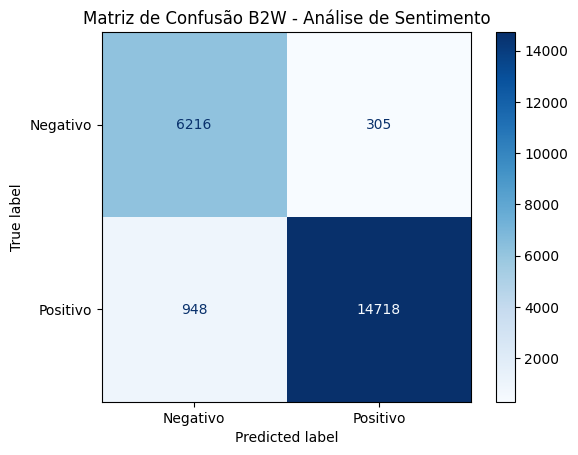

In [ ]:
cm = confusion_matrix(y_test, y_pred, labels=pipeline.classes_)

disp = ConfusionMatrixDisplay(
    confusion_matrix=cm,
    display_labels=pipeline.classes_
)

disp.plot(cmap='Blues')
plt.title("Matriz de Confusão B2W - Análise de Sentimento")
plt.show()

# Conclusão do Modelo

### 1. Diagnóstico Geral
A Matriz de Confusão acima revela como o modelo (Regressão Logística + TF-IDF) se comportou ao classificar os dados de teste. Observamos uma **polarização forte**, onde o modelo performa muito bem nas extremidades (Positivo/Negativo), mas enfrenta dificuldades severas na classe intermediária.

### 2. Pontos Fortes (O que funcionou)
* **Alta Detecção de Positivos:** O modelo acertou **14.735** avaliações positivas (canto inferior direito). A taxa de erro aqui é muito baixa, indicando que quando o cliente elogia, o modelo entende com clareza.
* **Boa Detecção de Negativos:** Foram **6.210** acertos na classe Negativa. O modelo consegue capturar bem o vocabulário de insatisfação (ex: "não", "defeito", "ruim").

### 3. Conclusão
Com base nesta análise, conclui-se que ambas as classes se saíram bem nos acertos e métricas, aa que se destacou com mehor perfomance foi a classe positiva (a quantidade de comentários positivos ser maior influênciou no aprendizado do modelo também).

## Salvar o pipeline e o modelo com joblib.dump.

In [ ]:
joblib.dump(pipeline, 'sentiment_pipeline.joblib')
pipeline_loaded = joblib.load('sentiment_pipeline.joblib')

testando manualmente o modelo

In [ ]:
texto_teste = ["O atendimento foi rápido e excelente"]

predicao = pipeline_loaded.predict(texto_teste)
probabilidade = pipeline_loaded.predict_proba(texto_teste)

print("Previsão:", predicao[0])
print("Probabilidade:", max(probabilidade[0]))


Previsão: Positivo
Probabilidade: 0.9951681442047012


In [ ]:
def listar_top_palavras(df_fonte, sentimento_alvo, n=10):

    subset = df_fonte[df_fonte['sentiment'] == sentimento_alvo]['review_text']

    if len(subset) == 0:
        print(f"\n⚠️ Sem dados para o sentimento: {sentimento_alvo}")
        return

    tfidf = TfidfVectorizer(stop_words=stop_words_custom, max_features=5000, max_df=0.95)

    try:
        X = tfidf.fit_transform(subset.astype(str))

        soma_scores = X.sum(axis=0)

        palavras_scores = []
        for palavra, idx in tfidf.vocabulary_.items():
            palavras_scores.append((palavra, soma_scores[0, idx]))

        palavras_scores = sorted(palavras_scores, key=lambda x: x[1], reverse=True)

        print(f"\n=== TOP {n} PALAVRAS: {sentimento_alvo.upper()} ===")
        for i, (palavra, score) in enumerate(palavras_scores[:n]):
            print(f"{i+1}. {palavra} (Score: {score:.2f})")

    except ValueError as e:
        print(f"Erro ao processar {sentimento_alvo}: {e}")

sentimentos_existentes = df_limpo['sentiment'].unique()
print(f"Sentimentos encontrados no DF: {sentimentos_existentes}")

for s in sentimentos_existentes:
    if pd.notna(s):
        listar_top_palavras(df_limpo, s)

Sentimentos encontrados no DF: ['Positivo' 'Negativo']

=== TOP 10 PALAVRAS: POSITIVO ===
1. produto (Score: 5142.46)
2. recomendo (Score: 3535.61)
3. bom (Score: 3281.73)
4. entrega (Score: 3072.96)
5. excelente (Score: 2739.11)
6. prazo (Score: 2607.04)
7. qualidade (Score: 2585.16)
8. chegou (Score: 2353.04)
9. antes (Score: 2267.56)
10. ótimo (Score: 2225.18)

=== TOP 10 PALAVRAS: NEGATIVO ===
1. não (Score: 2439.32)
2. produto (Score: 1802.62)
3. recebi (Score: 1013.57)
4. ainda (Score: 734.94)
5. comprei (Score: 700.85)
6. veio (Score: 686.60)
7. nao (Score: 651.65)
8. americanas (Score: 594.40)
9. entrega (Score: 575.86)
10. chegou (Score: 560.88)


In [ ]:
#funçao pra extarir as top palavras do tf idf
def get_top_tfidf_keywords_for_comment(comment, tfidf_vectorizer_component, n=5):
    tfidf_matrix = tfidf_vectorizer_component.transform([comment])

    if tfidf_matrix.nnz == 0:
        return []

    feature_names = tfidf_vectorizer_component.get_feature_names_out()

    scores = {}
    for col_idx, score_value in zip(tfidf_matrix.indices, tfidf_matrix.data):
        scores[feature_names[col_idx]] = score_value

    sorted_keywords = sorted(scores.items(), key=lambda item: item[1], reverse=True)

    return sorted_keywords[:n]

tfidf_component = pipeline_loaded.named_steps['tfidf']
#lista de comentários irônicos
comentarios_para_teste = [
    "Nossa, ficou incrível… exatamente como eu temia.",
    "Interessante a sua solução, não tinha pensado em algo tão complicado.",
    "Surpreendente como sempre dá errado no último momento.",
    "Parabéns pelo esforço, mas o resultado deixou a desejar.",
    "É impressionante a capacidade de piorar algo simples.",
    "Que ótimo, mais um problema para resolver."
]

print("=== Análise de Sentimento e Palavras-Chave para Múltiplos Comentários ===\n")

for comentario in comentarios_para_teste:
    predicao = pipeline_loaded.predict([comentario])
    probabilidade = pipeline_loaded.predict_proba([comentario])
    max_prob = max(probabilidade[0])
    sentimento_previsto = predicao[0]
    #extrai as top palavras do comentário
    top_keywords = get_top_tfidf_keywords_for_comment(comentario, tfidf_component, n=3)

    print(f"Comentário: {comentario}")
    print(f"  Previsão: {sentimento_previsto}")
    print(f"  Probabilidade: {max_prob:.4f}")
    if top_keywords:
        keywords_str = ", ".join([f"{word} ({score:.2f})" for word, score in top_keywords])
        print(f"  Palavras-Chave: {keywords_str}\n")
    else:
        print(f"  Palavras-Chave: Nenhuma palavra-chave relevante encontrada ou comentário muito curto.\n")

=== Análise de Sentimento e Palavras-Chave para Múltiplos Comentários ===

Comentário: Nossa, ficou incrível… exatamente como eu temia.
  Previsão: Positivo
  Probabilidade: 0.9889
  Palavras-Chave: incrível (0.65), exatamente (0.57), ficou (0.50)

Comentário: Interessante a sua solução, não tinha pensado em algo tão complicado.
  Previsão: Negativo
  Probabilidade: 0.9433
  Palavras-Chave: complicado (0.51), interessante (0.47), solução (0.44)

Comentário: Surpreendente como sempre dá errado no último momento.
  Previsão: Positivo
  Probabilidade: 0.7310
  Palavras-Chave: surpreendente (0.51), último (0.50), errado (0.40)

Comentário: Parabéns pelo esforço, mas o resultado deixou a desejar.
  Previsão: Positivo
  Probabilidade: 0.6965
  Palavras-Chave: esforço (0.53), deixou desejar (0.44), resultado (0.40)

Comentário: É impressionante a capacidade de piorar algo simples.
  Previsão: Positivo
  Probabilidade: 0.5454
  Palavras-Chave: piorar (0.53), impressionante (0.53), capacidade (

#Limitações na detecção de ironia e sarcasmo
De acordo com testes manuais realizados, foi observado que o modelo apresenta dificuldades para predizer corretamente comentários irônicos ou sarcásticos. Esse comportamento está diretamente relacionado à estrutura linguística típica desse tipo de comentário.

Em geral, comentários sarcásticos são compostos majoritariamente por palavras de polaridade positiva, seguidas por um trecho final com termos ou expressões de sentido negativo, responsáveis por inverter o significado global da frase. Como o modelo utiliza TF-IDF para representar o texto, as palavras positivas acabam tendo maior peso na representação vetorial, influenciando a predição final.

Além disso, o conjunto de dados utilizado no treinamento contém poucos exemplos de comentários irônicos ou sarcásticos. Essa baixa representatividade faz com que o modelo não aprenda adequadamente esses padrões linguísticos específicos, resultando em desempenho inferior nesse tipo de cenário.

Por esses motivos, o modelo tende a classificar comentários irônicos como positivos, mesmo quando o sentido semântico global é negativo.